In [1]:
import numpy as np
import pandas as pd

# 划分训练集和测试集
from sklearn.model_selection import train_test_split
# KNN
from sklearn.neighbors import KNeighborsClassifier
# 逻辑回归
from sklearn.linear_model import LogisticRegression as LR
# 朴素贝叶斯
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB


In [25]:
df = pd.read_csv('bankloan.csv')
df.head()

,年龄,教育,工龄,地址,收入,负债率,信用卡负债,其他负债,违约
0,41,3,17,12,176.0,9.3,11.36,5.01,1
1,27,1,10,6,31.0,17.3,1.36,4.00,0
2,40,1,15,14,55.0,5.5,0.86,2.17,0
3,41,1,15,14,120.0,2.9,2.66,0.82,0
4,24,2,2,0,28.0,17.3,1.79,3.06,1


In [26]:
df.columns

Index(['年龄', '教育', '工龄', '地址', '收入', '负债率', '信用卡负债', '其他负债', '违约'], dtype='object')

In [44]:
df.describe()

,年龄,教育,工龄,地址,收入,负债率,信用卡负债,其他负债,违约,年龄_dengpin,教育_dengpin,工龄_dengpin
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553457,3.058229,0.261429,1.570000,2.468571,1.604286
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117209,3.287524,0.439727,1.148221,0.499368,1.125455
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.010000,0.050000,0.000000,0.000000,2.000000,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.370000,1.047500,0.000000,1.000000,2.000000,1.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.855000,1.985000,0.000000,2.000000,2.000000,2.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.905000,3.927500,1.000000,3.000000,3.000000,3.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.560000,27.030000,1.000000,3.000000,3.000000,3.000000


等频分段

In [30]:
def dengpinfenduan(x, cut1, cut2, cut3):
    if x < cut1:
        return 0
    elif x < cut2:
        return 1
    elif x < cut3:
        return 2
    else:
        return 3

In [36]:
for col in ['年龄', '教育', '工龄']:
    des = df[col].describe()
    cut1, cut2, cut3 = des['25%'], des['50%'], des['75%']
    df[col+'_dengpin'] = df[col].apply(lambda x: dengpinfenduan(x, cut1, cut2, cut3))

In [45]:
'年龄' + '_dengpin'

'年龄_dengpin'

In [37]:
df.head()

,年龄,教育,工龄,地址,收入,负债率,信用卡负债,其他负债,违约,年龄_dengpin,教育_dengpin,工龄_dengpin
0,41,3,17,12,176.0,9.3,11.36,5.01,1,3,3,3
1,27,1,10,6,31.0,17.3,1.36,4.00,0,0,2,2
2,40,1,15,14,55.0,5.5,0.86,2.17,0,3,2,3
3,41,1,15,14,120.0,2.9,2.66,0.82,0,3,2,3
4,24,2,2,0,28.0,17.3,1.79,3.06,1,0,3,0


cut

In [38]:
def feature_cut(col, bins, labels):
    return pd.cut(df[col], bins=bins, labels=labels)

In [39]:
# df['年龄_cut'] = feature_cut('年龄', bins=[0, 20, 30, 40, 50, 60, 100], labels=[0, 1, 2, 3, 4, 5])
# df['工龄_cut'] = feature_cut('工龄', bins=[-1, 5, 10, 15, 20, 25, 35], labels=[0, 1, 2, 3, 4, 5])

In [41]:
bins_dct = {'年龄': [0, 20, 30, 40, 50, 60, 100], '工龄': [-1, 5, 10, 15, 20, 25, 35]}
labels_dct = {'年龄': [0, 1, 2, 3, 4, 5], '工龄': [0, 1, 2, 3, 4, 5]}
for col in ['年龄', '工龄']:
    bins = bins_dct[col]
    labels = labels_dct[col]
    df[col+'_cut_new'] = feature_cut(col, bins, labels)

In [42]:
df.head()

,年龄,教育,工龄,地址,收入,负债率,信用卡负债,其他负债,违约,年龄_dengpin,教育_dengpin,工龄_dengpin,年龄_cut,工龄_cut,年龄_cut_new,工龄_cut_new
0,41,3,17,12,176.0,9.3,11.36,5.01,1,3,3,3,3,3,3,3
1,27,1,10,6,31.0,17.3,1.36,4.00,0,0,2,2,1,1,1,1
2,40,1,15,14,55.0,5.5,0.86,2.17,0,3,2,3,2,2,2,2
3,41,1,15,14,120.0,2.9,2.66,0.82,0,3,2,3,3,2,3,2
4,24,2,2,0,28.0,17.3,1.79,3.06,1,0,3,0,1,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   年龄      700 non-null    int64  
 1   教育      700 non-null    int64  
 2   工龄      700 non-null    int64  
 3   地址      700 non-null    int64  
 4   收入      700 non-null    float64
 5   负债率     700 non-null    float64
 6   信用卡负债   700 non-null    float64
 7   其他负债    700 non-null    float64
 8   违约      700 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 49.3 KB


In [4]:
df_corr = df.corr()

In [7]:
df_corr

,年龄,教育,工龄,地址,收入,负债率,信用卡负债,其他负债,违约
年龄,1.000000,0.022325,0.536497,0.597591,0.478710,0.016398,0.295137,0.340218,-0.137657
教育,0.022325,1.000000,-0.153621,0.056919,0.235190,0.008838,0.088245,0.165460,0.114676
工龄,0.536497,-0.153621,1.000000,0.322334,0.619681,-0.031182,0.403701,0.406075,-0.282978
地址,0.597591,0.056919,0.322334,1.000000,0.316245,0.011323,0.208414,0.226527,-0.164451
收入,0.478710,0.235190,0.619681,0.316245,1.000000,-0.026777,0.570217,0.610649,-0.070970
负债率,0.016398,0.008838,-0.031182,0.011323,-0.026777,1.000000,0.501732,0.584925,0.389575
信用卡负债,0.295137,0.088245,0.403701,0.208414,0.570217,0.501732,1.000000,0.633098,0.244739
其他负债,0.340218,0.165460,0.406075,0.226527,0.610649,0.584925,0.633098,1.000000,0.145815
违约,-0.137657,0.114676,-0.282978,-0.164451,-0.070970,0.389575,0.244739,0.145815,1.000000


In [11]:
df_corr_y = df_corr['违约'].abs().sort_values(ascending=False)
df_corr_y

违约       1.000000
负债率      0.389575
工龄       0.282978
信用卡负债    0.244739
地址       0.164451
其他负债     0.145815
年龄       0.137657
教育       0.114676
收入       0.070970
Name: 违约, dtype: float64

In [12]:
feature =  df_corr_y[df_corr_y>0]

In [15]:
feature.index

Index(['违约', '负债率', '工龄', '信用卡负债', '地址', '其他负债', '年龄', '教育', '收入'], dtype='object')

In [17]:
df.columns

Index(['年龄', '教育', '工龄', '地址', '收入', '负债率', '信用卡负债', '其他负债', '违约'], dtype='object')

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df[['负债率', '工龄', '信用卡负债', '地址', '其他负债', '年龄', '教育', '收入']], df['违约'], test_size=0.2)

In [19]:
x_train.shape

(560, 8)

In [20]:
y_train.shape

(560,)

In [21]:
# 逻辑回归
r = []
for p in ['l1', 'l2','elasticnet','none']:
    for inter in [False, True]:
        for s in ['newton-cg', 'lbfgs','liblinear','sag', 'saga']:
            for mu in ['ovr', 'multinomial']:
                try:
                    lr = LR(penalty=p, solver=s, multi_class=mu, max_iter=10000,fit_intercept=inter).fit(x_train, y_train)
                    d = {'penalty':p,'solver':s,'multi_class':mu,'fit_intercept':inter,'score':lr.score(x_test, y_test)}
                    r.append(d)
                except ValueError:
                    print({'penalty':p,'solver':s})
r = pd.DataFrame(r)

{'penalty': 'l1', 'solver': 'newton-cg'}
{'penalty': 'l1', 'solver': 'newton-cg'}
{'penalty': 'l1', 'solver': 'lbfgs'}
{'penalty': 'l1', 'solver': 'lbfgs'}
{'penalty': 'l1', 'solver': 'liblinear'}
{'penalty': 'l1', 'solver': 'sag'}
{'penalty': 'l1', 'solver': 'sag'}
{'penalty': 'l1', 'solver': 'newton-cg'}
{'penalty': 'l1', 'solver': 'newton-cg'}
{'penalty': 'l1', 'solver': 'lbfgs'}
{'penalty': 'l1', 'solver': 'lbfgs'}
{'penalty': 'l1', 'solver': 'liblinear'}
{'penalty': 'l1', 'solver': 'sag'}
{'penalty': 'l1', 'solver': 'sag'}
{'penalty': 'l2', 'solver': 'liblinear'}
{'penalty': 'l2', 'solver': 'liblinear'}
{'penalty': 'elasticnet', 'solver': 'newton-cg'}
{'penalty': 'elasticnet', 'solver': 'newton-cg'}
{'penalty': 'elasticnet', 'solver': 'lbfgs'}
{'penalty': 'elasticnet', 'solver': 'lbfgs'}
{'penalty': 'elasticnet', 'solver': 'liblinear'}
{'penalty': 'elasticnet', 'solver': 'liblinear'}
{'penalty': 'elasticnet', 'solver': 'sag'}
{'penalty': 'elasticnet', 'solver': 'sag'}
{'penalty': 

In [23]:
r.sort_values(by='score')

,penalty,solver,multi_class,fit_intercept,score
0,l1,liblinear,ovr,False,0.771429
24,none,newton-cg,ovr,False,0.771429
25,none,newton-cg,multinomial,False,0.771429
26,none,lbfgs,ovr,False,0.771429
27,none,lbfgs,multinomial,False,0.771429
10,l2,liblinear,ovr,False,0.771429
8,l2,lbfgs,ovr,False,0.771429
9,l2,lbfgs,multinomial,False,0.771429
6,l2,newton-cg,ovr,False,0.771429
7,l2,newton-cg,multinomial,False,0.771429


In [24]:
df.describe()

,年龄,教育,工龄,地址,收入,负债率,信用卡负债,其他负债,违约
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553457,3.058229,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117209,3.287524,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.010000,0.050000,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.370000,1.047500,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.855000,1.985000,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.905000,3.927500,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.560000,27.030000,1.000000


In [55]:
#分段化处理年龄
df['年龄'] = pd.cut(df['年龄'], bins=[0, 20, 30, 40, 50, 60, 100], labels=[0, 1, 2, 3, 4, 5])
df['年龄'].value_counts()


2    284
1    240
3    148
4     26
0      2
5      0
Name: 年龄, dtype: int64

In [56]:
df['年龄'] = df['年龄'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   年龄      700 non-null    int64  
 1   教育      700 non-null    int64  
 2   工龄      700 non-null    int64  
 3   地址      700 non-null    int64  
 4   收入      700 non-null    float64
 5   负债率     700 non-null    float64
 6   信用卡负债   700 non-null    float64
 7   其他负债    700 non-null    float64
 8   违约      700 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 49.3 KB


In [57]:
#分段化处理工龄
df['工龄'] = pd.cut(df['工龄'], bins=[-1, 5, 10, 15, 20, 25, 35], labels=[0, 1, 2, 3, 4, 5])
df['工龄'].astype('int64')
df.value_counts()

年龄  教育  工龄  地址  收入    负债率   信用卡负债  其他负债  违约
0   1   0   0   14.0  9.7   0.20   1.16  1     1
2   2   2   8   49.0  1.3   0.27   0.36  0     1
            2   40.0  7.2   0.18   2.70  0     1
            3   63.0  18.2  5.55   5.92  0     1
                82.0  0.8   0.47   0.19  0     1
                                              ..
1   4   0   5   38.0  10.4  0.64   3.32  0     1
            6   24.0  12.1  1.60   1.31  1     1
                70.0  8.0   1.62   3.98  1     1
            7   27.0  2.9   0.31   0.47  0     1
4   5   1   0   70.0  9.4   1.33   5.25  1     1
Length: 700, dtype: int64

In [58]:
df['工龄'].value_counts()

0    280
1    190
2    116
3     71
4     33
5     10
Name: 工龄, dtype: int64

In [59]:
df['工龄'] = df['工龄'].astype('int64')

In [60]:
#分段化处理地址
df['地址'] = pd.cut(df['地址'], bins=[-1, 5, 10, 15, 20, 25, 35], labels=[0, 1, 2, 3, 4, 5])
df['地址'] = df['地址'].astype('int64')
df['地址'].value_counts()

0    297
1    187
2    103
3     64
4     35
5     14
Name: 地址, dtype: int64

In [61]:
print(df['负债率'].max())
print(df['负债率'].min())

41.3
0.4


In [62]:
df['负债率'] = pd.cut(df['负债率'], bins=[0, 7, 14, 21, 28, 35, 42], labels=[0, 1, 2, 3, 4, 5])
df['负债率'] = df['负债率'].astype('int64')
df['负债率'].value_counts()

0    281
1    242
2    123
3     40
4     11
5      3
Name: 负债率, dtype: int64

In [63]:
print(df['信用卡负债'].max())
print(df['信用卡负债'].min())

20.56
0.01


In [86]:
s = df['信用卡负债'].sort_values().head(int(len(df)*0.95))
s.mean()

1.1866766917293232

In [87]:
df['信用卡负债'] = pd.cut(df['信用卡负债'], bins=[0, 0.3, 0.6, 0.9, 1.2, 1.5, 21], labels=[0, 1, 2, 3, 4, 5])
df['信用卡负债'] = df['信用卡负债'].astype('int64')
df['信用卡负债'].value_counts()

5    227
0    143
1    140
2     80
3     61
4     49
Name: 信用卡负债, dtype: int64

In [90]:
print(df['其他负债'].max())
print(df['其他负债'].min())

27.03
0.05


(array([452., 147.,  50.,  26.,  12.,   4.,   6.,   1.,   1.,   1.]),
 array([ 0.05 ,  2.748,  5.446,  8.144, 10.842, 13.54 , 16.238, 18.936,
        21.634, 24.332, 27.03 ]),
 <BarContainer object of 10 artists>)

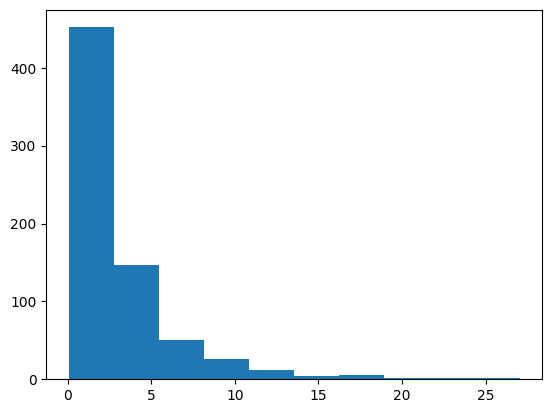

In [91]:
plt.hist(df['其他负债'])

In [92]:
s2 = df['其他负债'].sort_values().head(int(len(df)*0.95))
s2.mean()

2.4950526315789476

In [93]:
df['其他负债'] = pd.cut(df['其他负债'], bins=[0, 1, 2, 3, 4, 5, 28], labels=[0, 1, 2, 3, 4, 5])
df['其他负债'] = df['其他负债'].astype('int64')
df['其他负债'].value_counts()

1    187
0    167
5    120
2    118
3     59
4     49
Name: 其他负债, dtype: int64

(array([542., 115.,  26.,   9.,   3.,   4.,   0.,   0.,   0.,   1.]),
 array([ 14. ,  57.2, 100.4, 143.6, 186.8, 230. , 273.2, 316.4, 359.6,
        402.8, 446. ]),
 <BarContainer object of 10 artists>)

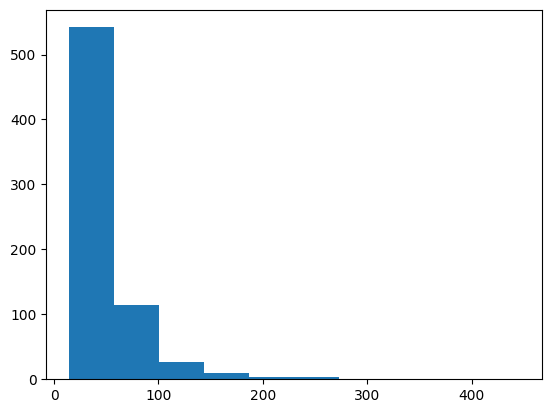

In [95]:
plt.hist(df['收入'])

In [98]:
s3 = df['收入'].sort_values().head(int(len(df)*0.95))
s3.mean()

39.41654135338346

In [104]:
df['收入'].fillna(0,inplace=True)

In [105]:
df['收入'] = pd.cut(df['收入'], bins=[0, 15, 30, 45, 60, 75, 115], labels=[0, 1, 2, 3, 4, 5])
df['收入'] = df['收入'].astype('int64')
df['收入'].value_counts()

1    284
2    174
3     86
4     56
5     55
0     45
Name: 收入, dtype: int64

In [107]:
df

,年龄,教育,工龄,地址,收入,负债率,信用卡负债,其他负债,违约
0,3,3,3,2,0,1,5,5,1
1,1,1,1,1,2,2,4,3,0
2,2,1,2,2,3,0,2,2,0
3,3,1,2,2,0,0,5,0,0
4,1,2,0,0,1,2,5,3,1
...,...,...,...,...,...,...,...,...,...
695,2,2,1,2,1,0,0,0,1
696,1,2,1,0,1,1,1,2,0
697,2,1,2,0,2,1,1,1,0
698,3,1,3,4,5,1,5,4,0


In [108]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [109]:
x_train.shape,  x_test.shape, y_train.shape, y_test.shape

((560, 8), (140, 8), (560,), (140,))

In [110]:
# 朴素贝叶斯
gs_nb = GaussianNB().fit(x_train,y_train)
gs_nb.score(x_test,y_test)

0.7571428571428571

In [111]:
# 多项式
mu_nb = MultinomialNB().fit(x_train,y_train)
mu_nb.score(x_test,y_test)

0.7714285714285715

In [112]:
bl_nb = BernoulliNB().fit(x_train,y_train)
bl_nb.score(x_test,y_test)

0.75

In [116]:
# 逻辑回归
r = []
for p in ['l1', 'l2','elasticnet','none']:
    for inter in [False, True]:
        for s in ['newton-cg', 'lbfgs','liblinear','sag', 'saga']:
            for mu in ['ovr', 'multinomial']:
                try:
                    lr = LR(penalty=p, solver=s, multi_class=mu, max_iter=10000,fit_intercept=inter).fit(x_train,y_train)
                    d = {'penalty':p,'solver':s,'multi_class':mu,'fit_intercept':inter,'score':lr.score(x_test,y_test)}
                    r.append(d)
                except ValueError:
                    print({'penalty':p,'solver':s})
r = pd.DataFrame(r)

{'penalty': 'l1', 'solver': 'newton-cg'}
{'penalty': 'l1', 'solver': 'newton-cg'}
{'penalty': 'l1', 'solver': 'lbfgs'}
{'penalty': 'l1', 'solver': 'lbfgs'}
{'penalty': 'l1', 'solver': 'liblinear'}
{'penalty': 'l1', 'solver': 'sag'}
{'penalty': 'l1', 'solver': 'sag'}
{'penalty': 'l1', 'solver': 'newton-cg'}
{'penalty': 'l1', 'solver': 'newton-cg'}
{'penalty': 'l1', 'solver': 'lbfgs'}
{'penalty': 'l1', 'solver': 'lbfgs'}
{'penalty': 'l1', 'solver': 'liblinear'}
{'penalty': 'l1', 'solver': 'sag'}
{'penalty': 'l1', 'solver': 'sag'}
{'penalty': 'l2', 'solver': 'liblinear'}
{'penalty': 'l2', 'solver': 'liblinear'}
{'penalty': 'elasticnet', 'solver': 'newton-cg'}
{'penalty': 'elasticnet', 'solver': 'newton-cg'}
{'penalty': 'elasticnet', 'solver': 'lbfgs'}
{'penalty': 'elasticnet', 'solver': 'lbfgs'}
{'penalty': 'elasticnet', 'solver': 'liblinear'}
{'penalty': 'elasticnet', 'solver': 'liblinear'}
{'penalty': 'elasticnet', 'solver': 'sag'}
{'penalty': 'elasticnet', 'solver': 'sag'}
{'penalty': 

In [118]:
r.sort_values(by='score',ascending=False).head(10)

,penalty,solver,multi_class,fit_intercept,score
39,none,saga,multinomial,True,0.800000
38,none,saga,ovr,True,0.800000
37,none,sag,multinomial,True,0.800000
36,none,sag,ovr,True,0.800000
35,none,lbfgs,multinomial,True,0.800000
34,none,lbfgs,ovr,True,0.800000
33,none,newton-cg,multinomial,True,0.800000
32,none,newton-cg,ovr,True,0.800000
19,l2,liblinear,ovr,True,0.800000
16,l2,newton-cg,multinomial,True,0.792857


In [119]:
lr_best = LR(penalty='none', solver='lbfgs', multi_class='multinomial', max_iter=10000,fit_intercept=True).fit(x_train,y_train)
lr_best.score(x_test,y_test)

0.8

In [121]:
# KNN
result = []
for k in range(5, 15):
    for w in ['uniform', 'distance']:
        knn = KNeighborsClassifier(n_neighbors=k, weights=w).fit(x_train, y_train)  #使用训练集训练此参数下的模型
        result.append({'n_neighbors': k, 'weights': w, 'score': knn.score(x_test, y_test)})  #输出当前参数及准确度
result = pd.DataFrame(result)
result

e:\software2\Anaconda3\envs\DataAna\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
e:\software2\Anaconda3\envs\DataAna\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be 

,n_neighbors,weights,score
0,5,uniform,0.728571
1,5,distance,0.707143
2,6,uniform,0.714286
3,6,distance,0.721429
4,7,uniform,0.728571
5,7,distance,0.728571
6,8,uniform,0.714286
7,8,distance,0.728571
8,9,uniform,0.735714
9,9,distance,0.721429


In [122]:
print(x_train.shape)
print(x_train.shape[0]**0.5)

(560, 8)
23.664319132398465


In [128]:
result.sort_values(by='score', ascending=False, inplace=True)
result[(result.score>0.7) & (result.n_neighbors>10)]

,n_neighbors,weights,score
12,11,uniform,0.742857
16,13,uniform,0.742857
15,12,distance,0.735714
19,14,distance,0.735714
17,13,distance,0.728571
14,12,uniform,0.721429
13,11,distance,0.714286
18,14,uniform,0.714286


In [129]:
knn_best = KNeighborsClassifier(n_neighbors=14, weights='distance').fit(x_train, y_train)
knn_best.score(x_test, y_test)

0.7357142857142858

In [130]:
# KNN 0.735414
# 朴素贝叶斯多项式 0.7714
# 逻辑回归 0.8

lr_best.score(x_test,y_test)

0.8